# Import stuff

In [ ]:
# import our algorithms
from all_functions import *

# INSIDE THIS MODULE WE SET THE FOLLOWING GLOBAL VARIABLES
# t=180 # time to run
# sw=1 # step width
# tau = 50 # diameter of the nuclear norm ball
# D = tau 
# L = 1 # Lipshitz constant
# G = 1

# Fashion MNIST

In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = (
    fashion_mnist.load_data()) #The dataset is already divided in test and training

class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [ ]:
X_train_full_vector =  X_train_full.reshape(X_train_full.shape[0], 784) #28*28 

X_train_full_vector.shape

(60000, 784)

In [ ]:
data = X_train_full_vector.T

data.shape

(784, 60000)

In [ ]:
features = data
classes = y_train_full
classes = classes.astype(int)

# modify the global variables N, M, H inside the imported module
set_global_dimentions(N_new = features.shape[1],M_new = features.shape[0], H_new = len(np.unique(classes)))
from all_functions import N, M, H
print("M (n. of features): {}, N (n. of samples): {}, H (n. of classes): {}".format(M, N, H))

M (n. of features): 784, N (n. of samples): 60000, H (n. of classes): 10


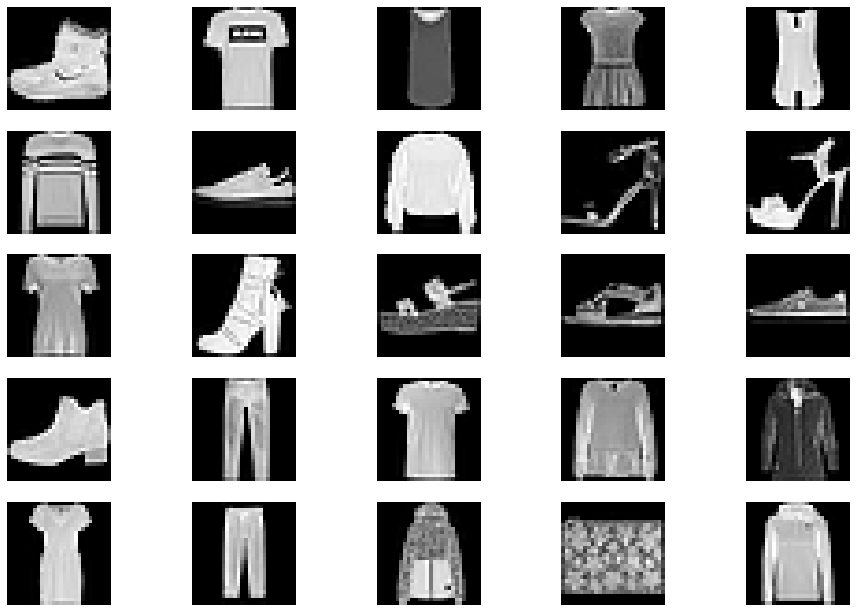

In [ ]:
# some visualization
n = 5

fig, axes = plt.subplots(n,n, figsize=(16,11))
index = 0
for i in range(n):
    for j in range(n):
        test= features[:,index]
        test = np.reshape(test, (28,28))
        axes[i,j].axis('off')
        axes[i,j].grid(b=None)
        _ = axes[i,j].imshow(test, cmap='gray')
        index+=1
    

In [ ]:
#initialize initial weights as a sparse matrix. 
np.random.seed(3)
weights_initial = scipy.sparse.random(H, features.shape[0], density=0.0009).A
print("Nuclear norm of initial weights: {}".format(np.linalg.norm(weights_initial, ord='nuc')))
print("Initial loss: {}".format(loss_function(weights_initial, features, classes)))

Nuclear norm of initial weights: 2.481220389833031
Initial loss: 61.4736306886368


## FW

In [ ]:
loss_fw, time_fw, weights_fw = fw(W = weights_initial, X = features, y = classes, lr = 0.0001, maxit = 1000, step_width=sw, time_to_run=t)

Iteration: 1;  Time Elapsed: 0;  Loss: 61.4736306886368
Iteration: 1;  Time Elapsed: 7.185225963592529;  Loss: 53.83346471206134
Iteration: 2;  Time Elapsed: 14.582182884216309;  Loss: 46.42931107846292
Iteration: 3;  Time Elapsed: 22.094527006149292;  Loss: 39.245182107504
Iteration: 4;  Time Elapsed: 29.495095014572144;  Loss: 32.337297335309806
Iteration: 5;  Time Elapsed: 36.09672498703003;  Loss: 25.796846454438075
Iteration: 6;  Time Elapsed: 42.38906788825989;  Loss: 19.78534256950107
Iteration: 7;  Time Elapsed: 49.09542393684387;  Loss: 14.672728356062171
Iteration: 8;  Time Elapsed: 55.4715838432312;  Loss: 11.083400527248005
Iteration: 9;  Time Elapsed: 61.75447177886963;  Loss: 9.036463186959653
Iteration: 10;  Time Elapsed: 68.26729083061218;  Loss: 8.05654374088662
Iteration: 11;  Time Elapsed: 74.7596447467804;  Loss: 7.567253809792197
Iteration: 12;  Time Elapsed: 81.18637585639954;  Loss: 7.345708116038066
Iteration: 13;  Time Elapsed: 87.91511392593384;  Loss: 7.20662

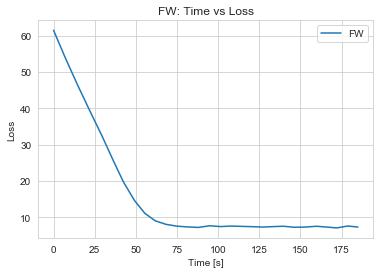

In [ ]:
plot('fw', loss_fw, time_fw)

In [ ]:
loss_function(weights_fw, features, classes)

7.301921476172481

In [ ]:
#does the minimum point respect the bound on the domain? (aka is it in omega?)
print(np.linalg.norm(weights_fw, ord = 'nuc'))

2.531741604552569


## SFW

In [ ]:
loss_sfw, time_sfw, weigths_sfw = sfw(W=weights_initial.copy(), X=features, y=classes, lr=0.0001, maxit=1000, step_width=sw, time_to_run=t)

Iteration: 1;  Time Elapsed: 0;  Loss: 61.4736306886368
Iteration: 1;  Time Elapsed: 2.2344741821289062;  Loss: 56.044597238547865
Iteration: 2;  Time Elapsed: 3.3778982162475586;  Loss: 49.730457023397925
Iteration: 3;  Time Elapsed: 4.68766188621521;  Loss: 42.76753713833699
Iteration: 4;  Time Elapsed: 5.87618613243103;  Loss: 36.085654497989935
Iteration: 5;  Time Elapsed: 7.086748123168945;  Loss: 29.595201409636896
Iteration: 6;  Time Elapsed: 8.182745933532715;  Loss: 23.598696192050724
Iteration: 7;  Time Elapsed: 9.300992965698242;  Loss: 17.935734422770484
Iteration: 8;  Time Elapsed: 10.54282522201538;  Loss: 13.549247658979564
Iteration: 9;  Time Elapsed: 11.790126085281372;  Loss: 10.498780486986053
Iteration: 10;  Time Elapsed: 13.036705017089844;  Loss: 8.754203704007834
Iteration: 11;  Time Elapsed: 14.147804975509644;  Loss: 8.134978751713131
Iteration: 12;  Time Elapsed: 15.258408069610596;  Loss: 7.9397476864501915
Iteration: 13;  Time Elapsed: 16.440150022506714;  L

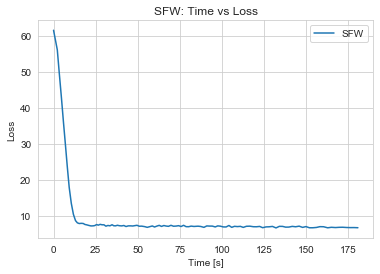

In [ ]:
plot('sfw', loss_sfw, time_sfw)

In [ ]:
#does the minimum point respect the bound on the domain?
print(np.linalg.norm(weigths_sfw, ord = 'nuc'))

2.800888143298663


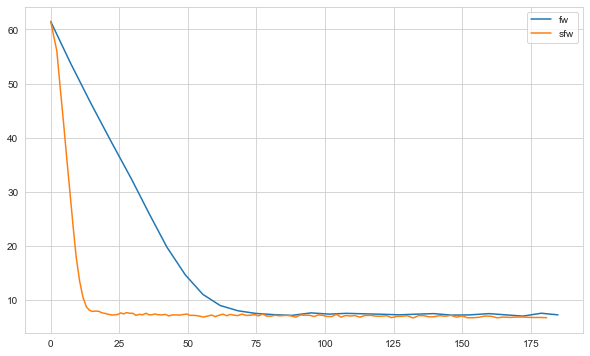

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(time_fw, loss_fw, label='fw')
plt.plot(time_sfw, loss_sfw, label='sfw')
plt.legend()
plt.show()

## SVRF

In [ ]:
loss_svrf, time_svrf, weights_svrf = svrf(W = weights_initial.copy(), X= features, y=  classes, epochs=10, time_to_run=t, step_width = sw, lr=0.0001)

Iteration: 1;  Time Elapsed: 0;  Loss: 61.4736306886368
Iteration: 1;  Time Elapsed: 7.194916009902954;  Loss: 57.48329027955284
Iteration: 2;  Time Elapsed: 8.329336166381836;  Loss: 50.66688068020779
Iteration: 3;  Time Elapsed: 9.554364919662476;  Loss: 43.52278102719809
Iteration: 4;  Time Elapsed: 10.719205856323242;  Loss: 42.57811388358975
Iteration: 5;  Time Elapsed: 11.788825035095215;  Loss: 35.95879480080861
Iteration: 6;  Time Elapsed: 12.854943037033081;  Loss: 29.965495907536273
Iteration: 7;  Time Elapsed: 13.872357845306396;  Loss: 24.775384488959418
Iteration: 8;  Time Elapsed: 15.071709871292114;  Loss: 18.727552211710503
Iteration: 9;  Time Elapsed: 16.274910926818848;  Loss: 14.437396230575425
Iteration: 10;  Time Elapsed: 17.479496002197266;  Loss: 10.741101609736488
Iteration: 11;  Time Elapsed: 18.66867208480835;  Loss: 9.218261945942842
Iteration: 12;  Time Elapsed: 19.785924196243286;  Loss: 10.527742347908662
Iteration: 13;  Time Elapsed: 20.997570037841797;  

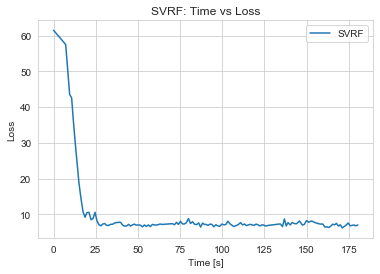

In [ ]:
plot('svrf', loss_svrf, time_svrf)

In [ ]:
#does the minimum point respect the bound on the domain?
print(np.linalg.norm(weights_svrf, ord = 'nuc'))

2.8194744610301368


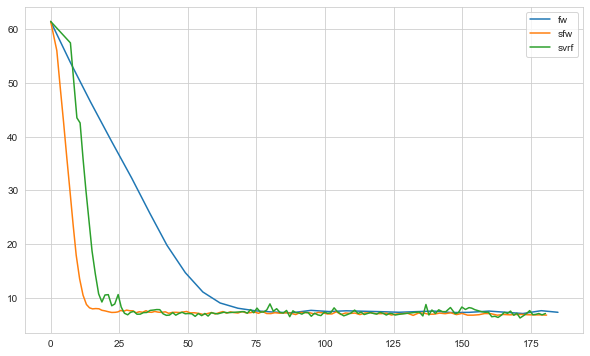

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(time_fw, loss_fw, label='fw')
plt.plot(time_sfw, loss_sfw, label='sfw')
plt.plot(time_svrf, loss_svrf, label='svrf')
plt.legend()
plt.show()

## SCGS

In [ ]:
info_fwg, loss_scgs, time_scgs, weights_scgs = scgs(W = weights_initial.copy(), X= features, y = classes, maxit = 1000, 
                                                    step_width=sw, time_to_run=t, lr=0.0001, lr_fwg=0.05)

Iteration: 1;  Time Elapsed: 0;  Loss: 61.4736306886368
Iteration: 1;  Time Elapsed: 2.974848985671997;  Loss: 61.344316173489
Iteration: 2;  Time Elapsed: 5.094878911972046;  Loss: 54.38508155524037
Iteration: 3;  Time Elapsed: 7.077317237854004;  Loss: 47.100889201003405
Iteration: 4;  Time Elapsed: 9.053812026977539;  Loss: 40.13365422942448
Iteration: 5;  Time Elapsed: 11.181422233581543;  Loss: 33.198835878809
Iteration: 6;  Time Elapsed: 12.874004125595093;  Loss: 26.516801931363112
Iteration: 7;  Time Elapsed: 14.719882011413574;  Loss: 20.613939856806013
Iteration: 8;  Time Elapsed: 16.527601957321167;  Loss: 15.491641523607868
Iteration: 9;  Time Elapsed: 18.53357219696045;  Loss: 11.953495339288256
Iteration: 10;  Time Elapsed: 20.919642210006714;  Loss: 10.352082663246875
Iteration: 11;  Time Elapsed: 23.15921902656555;  Loss: 9.79989953979903
Iteration: 12;  Time Elapsed: 25.603157997131348;  Loss: 9.777742312210892
Iteration: 13;  Time Elapsed: 28.11785101890564;  Loss: 9.

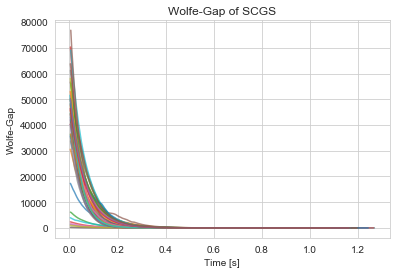

In [ ]:
plot_wg("SCGS",info_fwg,1)

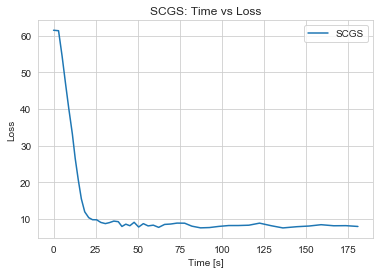

In [ ]:
plot('scgs', loss_scgs, time_scgs)

In [ ]:
#does the minimum point respect the bound on the domain? 
np.linalg.norm(weights_scgs, ord='nuc')

2.566941958809973

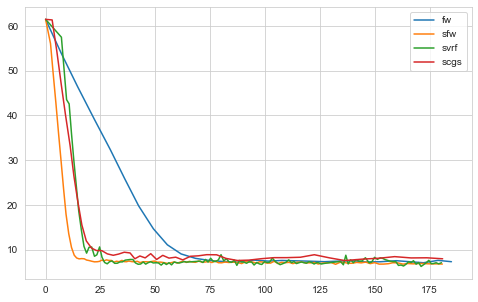

In [ ]:
plt.figure(figsize=(8,5))
plt.plot(time_fw, loss_fw, label='fw')
plt.plot(time_sfw, loss_sfw, label='sfw')
plt.plot(time_svrf, loss_svrf, label='svrf')
plt.plot(time_scgs, loss_scgs, label='scgs')
plt.legend()
plt.show()

## STORC

In [ ]:
info_fwg, loss_storc, time_storc, weights_storc = storc(W = weights_initial.copy(), X= features, y=classes, epochs=10,  
                                         step_width=sw, time_to_run=t, lr=0.00015, lr_fwg=0.05)

Iteration: 1;  Time Elapsed: 0;  Loss: 61.4736306886368
Iteration: 1;  Time Elapsed: 8.077322006225586;  Loss: 50.26190563214214
Iteration: 2;  Time Elapsed: 9.909116983413696;  Loss: 39.37620207758244
Iteration: 3;  Time Elapsed: 11.540835857391357;  Loss: 30.695415736353034
Iteration: 4;  Time Elapsed: 13.922837018966675;  Loss: 21.528192253741125
Iteration: 5;  Time Elapsed: 16.084003686904907;  Loss: 16.11887701828138
Iteration: 6;  Time Elapsed: 18.00306487083435;  Loss: 11.292284795580285
Iteration: 7;  Time Elapsed: 19.957216024398804;  Loss: 10.295467947711813
Iteration: 8;  Time Elapsed: 22.19608187675476;  Loss: 10.867827683795365
Iteration: 9;  Time Elapsed: 24.483922958374023;  Loss: 12.021641402342194
Iteration: 10;  Time Elapsed: 26.358353853225708;  Loss: 11.350758930783309
Iteration: 11;  Time Elapsed: 28.991719961166382;  Loss: 11.576070140098729
Iteration: 12;  Time Elapsed: 30.791882038116455;  Loss: 11.512559176059433
Iteration: 13;  Time Elapsed: 32.59750986099243;

In [ ]:
#does the minimum point respect the bound on the domain? 
#np.linalg.norm(weights_storc, ord='nuc')

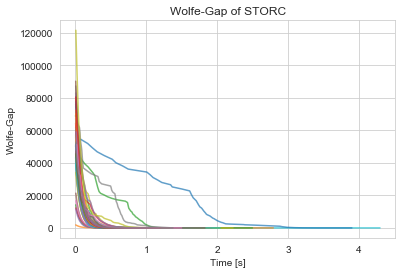

In [ ]:
plot_wg("STORC",info_fwg,1)

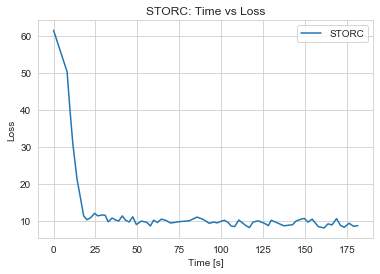

In [ ]:
plot('storc', loss_storc, time_storc)

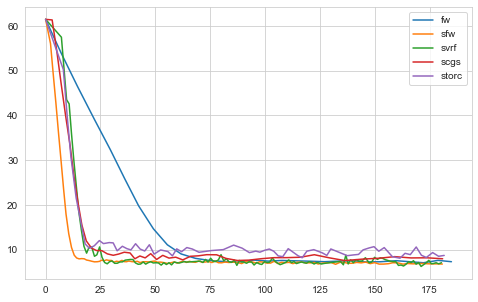

In [ ]:
plt.figure(figsize=(8,5))
plt.plot(time_fw, loss_fw, label='fw')
plt.plot(time_sfw, loss_sfw, label='sfw')
plt.plot(time_svrf, loss_svrf, label='svrf')
plt.plot(time_scgs, loss_scgs, label='scgs')
plt.plot(time_storc, loss_storc, label='storc')
plt.legend()
plt.show()

## SGM

In [ ]:
loss_sgm, time_sgm, W_sgm = sgm(W = weights_initial.copy(), X = features, y = classes, lr=0.0001
                                    , step_width=sw, maxit = 1000, time_to_run=t, batch_size=100, s=0.5)

Iteration: 1;  Time Elapsed: 0;  Loss: 61.4736306886368
Iteration: 1;  Time Elapsed: 2.492759943008423;  Loss: 53.85385152278991
Iteration: 2;  Time Elapsed: 3.656571865081787;  Loss: 46.64694334350554
Iteration: 3;  Time Elapsed: 4.818958044052124;  Loss: 39.49970834105056
Iteration: 4;  Time Elapsed: 6.111086845397949;  Loss: 32.60028692560012
Iteration: 5;  Time Elapsed: 7.303468942642212;  Loss: 26.055982457116635
Iteration: 6;  Time Elapsed: 8.634292840957642;  Loss: 20.304789714602094
Iteration: 7;  Time Elapsed: 9.884042024612427;  Loss: 14.90256964982662
Iteration: 8;  Time Elapsed: 11.14517879486084;  Loss: 11.046313547660821
Iteration: 9;  Time Elapsed: 12.424670934677124;  Loss: 9.001834977576499
Iteration: 10;  Time Elapsed: 13.683848857879639;  Loss: 7.846173156645086
Iteration: 11;  Time Elapsed: 14.947305917739868;  Loss: 7.387244987298837
Iteration: 12;  Time Elapsed: 16.781742811203003;  Loss: 7.608985286898286
Iteration: 13;  Time Elapsed: 17.93208909034729;  Loss: 7.

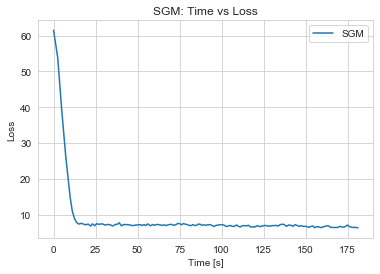

In [ ]:
plot('sgm', loss_sgm, time_sgm)

In [ ]:
#does the minimum point respect the bound on the domain? 
#np.linalg.norm(W_sgm, ord='nuc')

## SVRG

In [ ]:
loss_svrg, time_svrg, W_svrg = svrg(W = weights_initial.copy(), X = features, y = classes, lr=0.0001,
                                    step_width=sw, maxit = 1000, time_to_run=t, batch_size=100, s=0.5, epochs=20)

Iteration: 1;  Time Elapsed: 0;  Loss: 61.4736306886368
Iteration: 1;  Time Elapsed: 12.437438011169434;  Loss: 53.822332053039354
Iteration: 2;  Time Elapsed: 14.809871912002563;  Loss: 46.39156422173534
Iteration: 3;  Time Elapsed: 16.31761384010315;  Loss: 39.223299148148534
Iteration: 4;  Time Elapsed: 18.254904747009277;  Loss: 32.33579833982535
Iteration: 5;  Time Elapsed: 19.780382871627808;  Loss: 25.809214519423172
Iteration: 6;  Time Elapsed: 21.372309684753418;  Loss: 19.82012514232506
Iteration: 7;  Time Elapsed: 22.788700819015503;  Loss: 15.389510920175324
Iteration: 8;  Time Elapsed: 24.0874240398407;  Loss: 11.853525657137673
Iteration: 9;  Time Elapsed: 25.436229944229126;  Loss: 9.645180732269594
Iteration: 10;  Time Elapsed: 26.72067165374756;  Loss: 8.323572703593323
Iteration: 11;  Time Elapsed: 28.166493892669678;  Loss: 7.790627905925894
Iteration: 12;  Time Elapsed: 29.460586071014404;  Loss: 8.159412163807248
Iteration: 13;  Time Elapsed: 30.72775101661682;  Lo

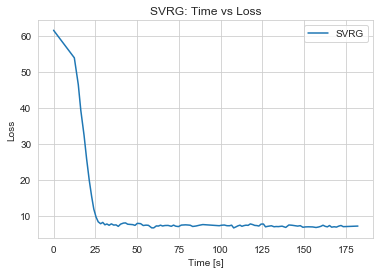

In [ ]:
plot('svrg', loss_svrg, time_svrg)

In [ ]:
#does the minimum point respect the bound on the domain?
#np.linalg.norm(weights_W_svrg, ord='nuc')

## Recap

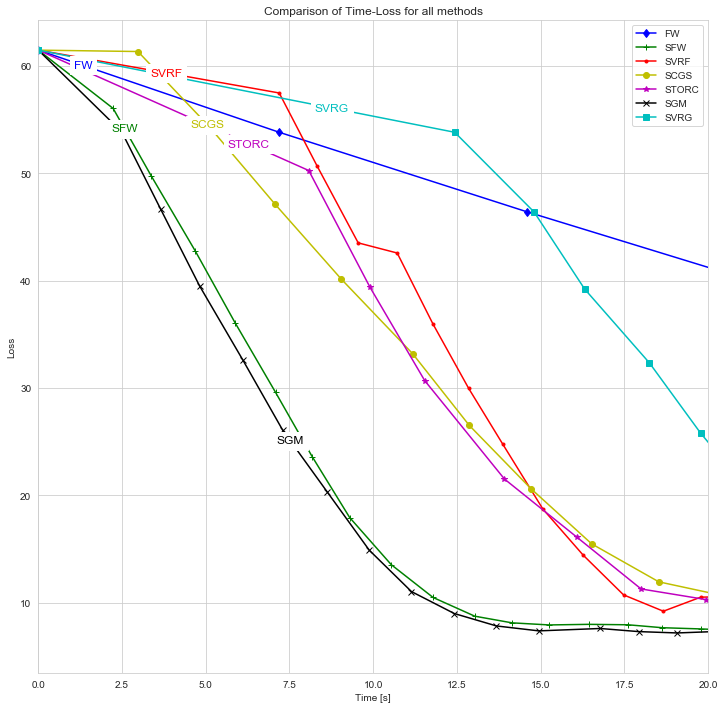

In [ ]:
plot_all(['FW', 'SFW','SVRF','SCGS','STORC','SGM','SVRG'], [loss_fw, loss_sfw,loss_svrf,loss_scgs,loss_storc,loss_sgm,loss_svrg], [time_fw, time_sfw,time_svrf,time_scgs,time_storc,time_sgm,time_svrg], xlimit=(0,20))

# SVHN

Source of data: https://www.csie.ntu.edu.tw/~cjlin/libsvmtools/datasets/multiclass.html#SVHN

For practicality reasons we only kept one color channel

In [ ]:
data_svhn = pd.read_csv("train.csv", sep=",", header=None)

In [ ]:
data_svhn.shape

(1024, 73257)

In [ ]:
data_svhn.head()

,0,1,2,3,4,5,6,7,8,9,...,73247,73248,73249,73250,73251,73252,73253,73254,73255,73256
0,33,84,19,18,108,132,83,129,42,70,...,114,93,178,121,106,26,20,92,190,216
1,28,85,21,15,108,129,86,111,37,81,...,111,79,184,123,77,24,22,92,183,204
2,40,83,21,34,109,121,88,108,31,85,...,105,74,186,122,54,23,29,99,171,198
3,48,80,19,65,109,113,91,103,30,75,...,98,79,188,123,62,22,25,114,164,202
4,51,89,20,119,110,105,89,95,31,62,...,91,83,190,122,104,22,31,130,174,210


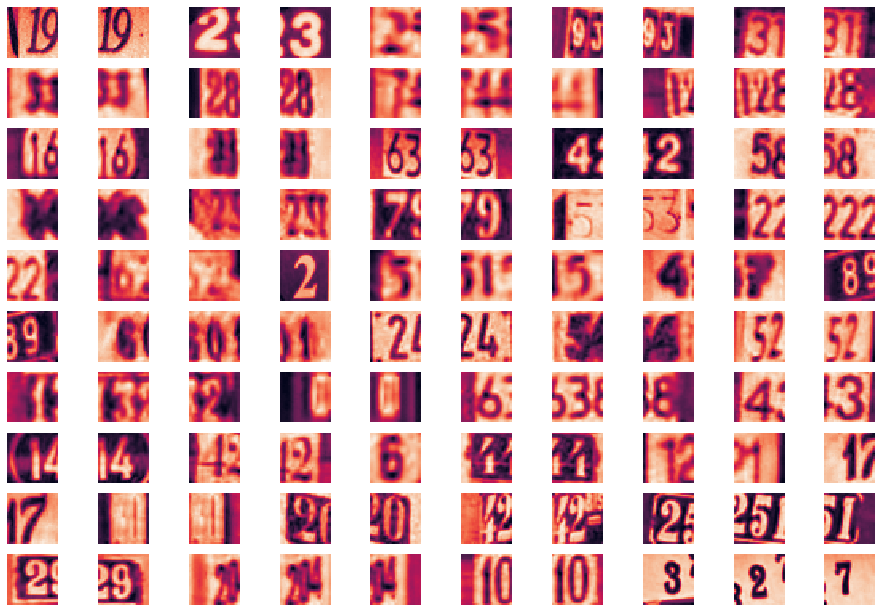

In [ ]:
features = np.array(data_svhn)
#features = features/255.0

n = 10

fig, axes = plt.subplots(n,n, figsize=(16,11))
index = 0
for i in range(n):
    for j in range(n):
        test= features[:,index]
        test = np.reshape(test, (32,32))
        test = test.T #rotate the image
        axes[i,j].axis('off')
        axes[i,j].grid(b=None)
        _ = axes[i,j].imshow(test)
        index+=1
    

In [ ]:
classes = pd.read_csv("y.csv", sep=",", header=None)
classes = np.array(classes)
classes = classes.flatten()
classes[classes==10] = 0 #replace entries with 10 with 0
classes.shape

(73257,)

In [ ]:
np.unique(classes)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [ ]:
classes = classes.astype(int)

# M = features.shape[0]
# N = features.shape[1]
# H = len(np.unique(classes))
# modify the global variables N, M, H inside the imported module
set_global_dimentions(N_new = features.shape[1],M_new = features.shape[0], H_new = len(np.unique(classes)))
from all_functions import N, M, H

print("M (n. of features): {}, N (n. of samples): {}, H (n. of classes): {}".format(M, N, H))

M (n. of features): 1024, N (n. of samples): 73257, H (n. of classes): 10


In [ ]:
weights_initial = scipy.sparse.random(H, M, density=0.0006).A
#weights_initial = np.zeros((H,M))
print("Nuclear norm of initial weights: {}\n".format(np.linalg.norm(weights_initial, ord='nuc')))
print("Shape of initial weights: {} \n".format(weights_initial.shape))
print("Initial Loss: {}".format(loss_function(weights_initial, features, classes)))

Nuclear norm of initial weights: 2.7148179440495417

Shape of initial weights: (10, 1024) 

Initial Loss: 81.9211954199791


## FW

In [ ]:
loss_fw, time_fw, weights_fw = fw(W = weights_initial, X = features, y = classes, lr = 0.0001, maxit = 1000, step_width=sw, time_to_run=t)

Iteration: 1;  Time Elapsed: 0;  Loss: 81.9211954199791
Iteration: 1;  Time Elapsed: 22.93188190460205;  Loss: 70.70990933306241
Iteration: 2;  Time Elapsed: 39.94394874572754;  Loss: 60.635135682604755
Iteration: 3;  Time Elapsed: 53.51924276351929;  Loss: 51.551962235018564
Iteration: 4;  Time Elapsed: 68.4132149219513;  Loss: 43.606777979898844
Iteration: 5;  Time Elapsed: 82.86470985412598;  Loss: 36.59253471537435
Iteration: 6;  Time Elapsed: 96.17288184165955;  Loss: 30.941607965725183
Iteration: 7;  Time Elapsed: 109.11537289619446;  Loss: 26.153766515838573
Iteration: 8;  Time Elapsed: 123.89631795883179;  Loss: 21.887974090710404
Iteration: 9;  Time Elapsed: 138.11457014083862;  Loss: 18.72337842890369
Iteration: 10;  Time Elapsed: 151.6457188129425;  Loss: 16.193087292422966
Iteration: 11;  Time Elapsed: 170.09568071365356;  Loss: 14.624473074340592
Iteration: 12;  Time Elapsed: 184.24642491340637;  Loss: 13.874204885637571


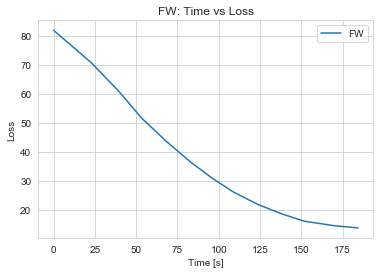

In [ ]:
plot('fw', loss_fw, time_fw)

In [ ]:
#does the minimum point respect the bound on the domain?
#np.linalg.norm(weights_fw, ord='nuc')

## SFW

In [ ]:
loss_sfw, time_sfw, weigths_sfw = sfw(W=weights_initial.copy(), X=features, y=classes, lr=0.0001, maxit=1000, step_width=sw, time_to_run=t)

Iteration: 1;  Time Elapsed: 0;  Loss: 81.9211954199791
Iteration: 1;  Time Elapsed: 5.294618129730225;  Loss: 72.16559385249974
Iteration: 2;  Time Elapsed: 8.042647123336792;  Loss: 66.92743684985822
Iteration: 3;  Time Elapsed: 10.833311080932617;  Loss: 58.36530576697123
Iteration: 4;  Time Elapsed: 14.437841176986694;  Loss: 49.589092077258385
Iteration: 5;  Time Elapsed: 17.156692028045654;  Loss: 43.072573722390906
Iteration: 6;  Time Elapsed: 19.987006902694702;  Loss: 37.03035692790337
Iteration: 7;  Time Elapsed: 22.517781972885132;  Loss: 32.15211931762468
Iteration: 8;  Time Elapsed: 25.108253955841064;  Loss: 26.622523470432107
Iteration: 9;  Time Elapsed: 28.468327283859253;  Loss: 22.5824291710491
Iteration: 10;  Time Elapsed: 31.14238405227661;  Loss: 19.08684968480059
Iteration: 11;  Time Elapsed: 33.858367919921875;  Loss: 16.92517720964977
Iteration: 12;  Time Elapsed: 36.66103506088257;  Loss: 14.374521009382633
Iteration: 13;  Time Elapsed: 39.55464005470276;  Loss

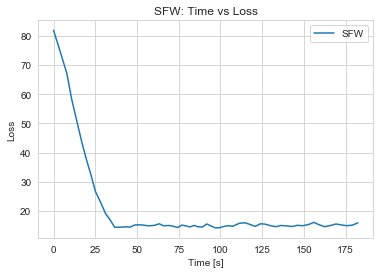

In [ ]:
plot('sfw', loss_sfw, time_sfw)

In [ ]:
#does the minimum point respect the bound on the domain?
print(np.linalg.norm(weigths_sfw, ord = 'nuc'))

2.8329305887221294


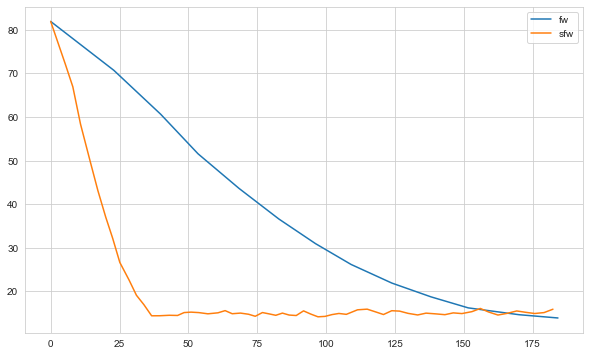

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(time_fw, loss_fw, label='fw')
plt.plot(time_sfw, loss_sfw, label='sfw')
plt.legend()
plt.show()

## SVRF

In [ ]:
loss_svrf, time_svrf, weights_svrf = svrf(W = weights_initial.copy(), X= features, y=  classes, epochs=10, 
                                          time_to_run=t, step_width = sw, lr=0.0001)

Iteration: 1;  Time Elapsed: 0;  Loss: 81.9211954199791
Iteration: 1;  Time Elapsed: 18.095810174942017;  Loss: 71.20431938520558
Iteration: 2;  Time Elapsed: 20.435123920440674;  Loss: 62.92107144033487
Iteration: 3;  Time Elapsed: 22.763626098632812;  Loss: 55.526775166914156
Iteration: 4;  Time Elapsed: 25.119613885879517;  Loss: 50.174117067467925
Iteration: 5;  Time Elapsed: 27.491608142852783;  Loss: 46.013009925334245
Iteration: 6;  Time Elapsed: 29.837859869003296;  Loss: 38.739694854812456
Iteration: 7;  Time Elapsed: 33.167513847351074;  Loss: 35.3913802091415
Iteration: 8;  Time Elapsed: 35.85495185852051;  Loss: 32.20070142955846
Iteration: 9;  Time Elapsed: 38.548413038253784;  Loss: 29.022282938992053
Iteration: 10;  Time Elapsed: 41.272228956222534;  Loss: 23.603666592097373
Iteration: 11;  Time Elapsed: 43.56961798667908;  Loss: 19.9178000185288
Iteration: 12;  Time Elapsed: 46.099990129470825;  Loss: 22.131347828935418
Iteration: 13;  Time Elapsed: 48.57012677192688;  

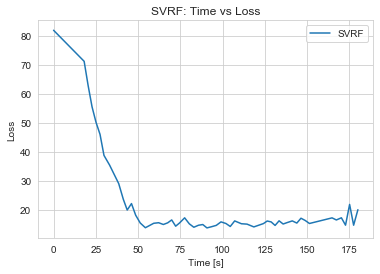

In [ ]:
plot('svrf', loss_svrf, time_svrf)

In [ ]:
#does the minimum point respect the bound on the domain?
print(np.linalg.norm(weights_svrf, ord = 'nuc'))

2.7917288628240784


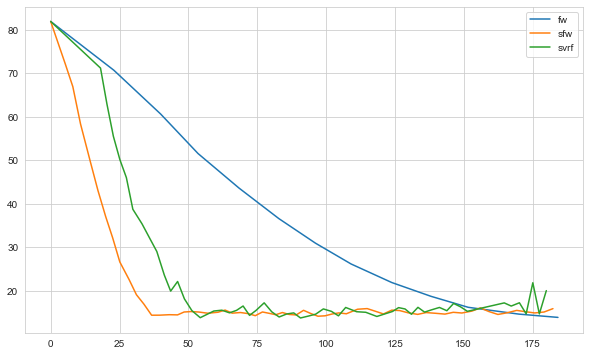

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(time_fw, loss_fw, label='fw')
plt.plot(time_sfw, loss_sfw, label='sfw')
plt.plot(time_svrf, loss_svrf, label='svrf')
plt.legend()
plt.show()

## SCGS

In [ ]:
info_fwg, loss_scgs, time_scgs, weights_scgs = scgs(W = weights_initial.copy(), X= features, y = classes, maxit = 1000, 
                                                    step_width=sw, time_to_run=t, lr=0.0001, lr_fwg = 0.1)

Iteration: 1;  Time Elapsed: 0;  Loss: 81.9211954199791
Iteration: 1;  Time Elapsed: 6.64515495300293;  Loss: 72.34604765859893
Iteration: 2;  Time Elapsed: 10.441842794418335;  Loss: 62.54737406821928
Iteration: 3;  Time Elapsed: 14.40969967842102;  Loss: 56.518809122337366
Iteration: 4;  Time Elapsed: 17.80992293357849;  Loss: 48.399388647644315
Iteration: 5;  Time Elapsed: 21.8153018951416;  Loss: 41.36067667965197
Iteration: 6;  Time Elapsed: 25.158800840377808;  Loss: 35.94451610216575
Iteration: 7;  Time Elapsed: 28.26991581916809;  Loss: 30.748514203337255
Iteration: 8;  Time Elapsed: 31.50635600090027;  Loss: 26.683023983372507
Iteration: 9;  Time Elapsed: 34.86757779121399;  Loss: 23.909582425881037
Iteration: 10;  Time Elapsed: 38.51491975784302;  Loss: 20.008298405175843
Iteration: 11;  Time Elapsed: 42.24848294258118;  Loss: 18.478450466229567
Iteration: 12;  Time Elapsed: 45.886207818984985;  Loss: 16.221028625059137
Iteration: 13;  Time Elapsed: 49.4707248210907;  Loss: 1

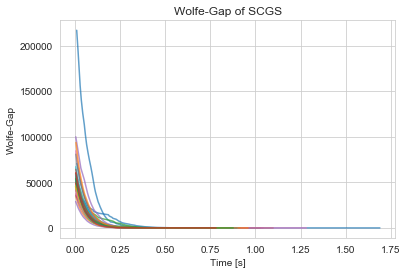

In [ ]:
plot_wg("SCGS",info_fwg,1)

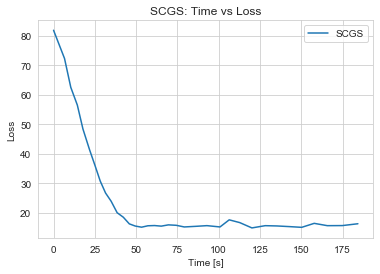

In [ ]:
plot('scgs', loss_scgs, time_scgs)

In [ ]:
#does the minimum point respect the bound on the domain?
np.linalg.norm(weights_scgs, ord='nuc')

2.7540231385858607

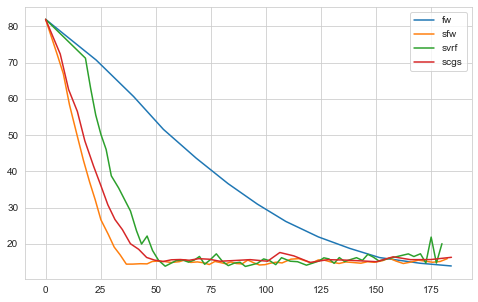

In [ ]:
plt.figure(figsize=(8,5))
plt.plot(time_fw, loss_fw, label='fw')
plt.plot(time_sfw, loss_sfw, label='sfw')
plt.plot(time_svrf, loss_svrf, label='svrf')
plt.plot(time_scgs, loss_scgs, label='scgs')
plt.legend()
plt.show()

## STORC

In [ ]:
info_fwg, loss_storc, time_storc, weights_storc = storc(W = weights_initial.copy(), X= features, y=classes, epochs=10,  
                                         step_width=sw, time_to_run=t, lr=0.0001, lr_fwg=0.5)

Iteration: 1;  Time Elapsed: 0;  Loss: 81.9211954199791
Iteration: 1;  Time Elapsed: 16.65194797515869;  Loss: 70.72613918045408
Iteration: 2;  Time Elapsed: 19.16632604598999;  Loss: 60.82510404782274
Iteration: 3;  Time Elapsed: 21.866404056549072;  Loss: 51.4825314873319
Iteration: 4;  Time Elapsed: 24.68741202354431;  Loss: 45.14841973471202
Iteration: 5;  Time Elapsed: 27.44150400161743;  Loss: 39.29803477931702
Iteration: 6;  Time Elapsed: 30.263505935668945;  Loss: 33.258017486368686
Iteration: 7;  Time Elapsed: 33.13238286972046;  Loss: 27.785825603383
Iteration: 8;  Time Elapsed: 36.76141691207886;  Loss: 26.90592506613776
Iteration: 9;  Time Elapsed: 39.18417501449585;  Loss: 21.955258297248395
Iteration: 10;  Time Elapsed: 41.80674719810486;  Loss: 19.879656345071304
Iteration: 11;  Time Elapsed: 45.41352391242981;  Loss: 18.10706333565284
Iteration: 12;  Time Elapsed: 48.777945041656494;  Loss: 15.475376877794872
Iteration: 13;  Time Elapsed: 51.86818504333496;  Loss: 14.83

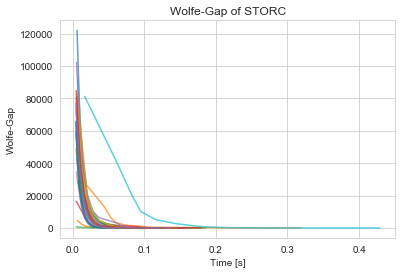

In [ ]:
plot_wg("STORC",info_fwg,1)

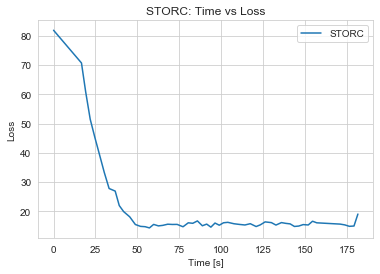

In [ ]:
plot('storc', loss_storc, time_storc)

In [ ]:
#does the minimum point respect the bound on the domain?
#np.linalg.norm(weights_storc, ord='nuc')

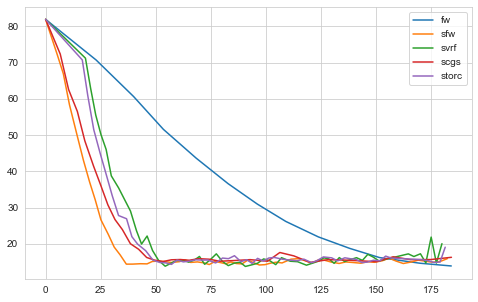

In [ ]:
plt.figure(figsize=(8,5))
plt.plot(time_fw, loss_fw, label='fw')
plt.plot(time_sfw, loss_sfw, label='sfw')
plt.plot(time_svrf, loss_svrf, label='svrf')
plt.plot(time_scgs, loss_scgs, label='scgs')
plt.plot(time_storc, loss_storc, label='storc')
plt.legend()
plt.show()

## SGM

In [ ]:
loss_sgm, time_sgm, W_sgm = sgm(W = weights_initial.copy(), X = features, y = classes, lr=0.0001
                                    , step_width=sw, maxit = 1000, time_to_run=t, batch_size=100, s=0.5)

Iteration: 1;  Time Elapsed: 0;  Loss: 81.9211954199791
Iteration: 1;  Time Elapsed: 4.309399127960205;  Loss: 71.0327224132122
Iteration: 2;  Time Elapsed: 6.414522171020508;  Loss: 61.91912403180714
Iteration: 3;  Time Elapsed: 8.497413158416748;  Loss: 52.67378471291722
Iteration: 4;  Time Elapsed: 10.554212093353271;  Loss: 44.55465263240914
Iteration: 5;  Time Elapsed: 12.671553134918213;  Loss: 37.55286796805985
Iteration: 6;  Time Elapsed: 14.79547643661499;  Loss: 31.63501260207753
Iteration: 7;  Time Elapsed: 16.89971137046814;  Loss: 27.00941664438881
Iteration: 8;  Time Elapsed: 18.99806523323059;  Loss: 23.547463033776733
Iteration: 9;  Time Elapsed: 21.10643219947815;  Loss: 19.594130374744623
Iteration: 10;  Time Elapsed: 23.22826910018921;  Loss: 18.395696807146358
Iteration: 11;  Time Elapsed: 25.332815170288086;  Loss: 15.439048652620476
Iteration: 12;  Time Elapsed: 27.438613414764404;  Loss: 14.77119119084533
Iteration: 13;  Time Elapsed: 29.556517124176025;  Loss: 1

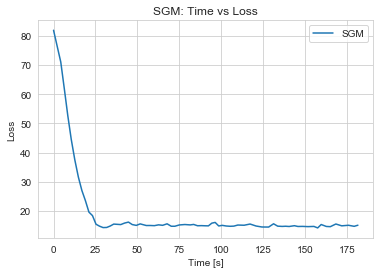

In [ ]:
plot('sgm', loss_sgm, time_sgm)

In [ ]:
#does the minimum point respect the bound on the domain? 
#np.linalg.norm(W_sgm, ord='nuc')

## SVRG

In [ ]:
loss_svrg, time_svrg, W_svrg = svrg(W = weights_initial.copy(), X = features, y = classes, lr=0.0001
                                    , step_width=sw, maxit = 1000, time_to_run=t, batch_size=100, s=0.5, epochs=20)

Iteration: 1;  Time Elapsed: 0;  Loss: 81.9211954199791
Iteration: 1;  Time Elapsed: 16.38634705543518;  Loss: 70.98967670996319
Iteration: 2;  Time Elapsed: 18.74554419517517;  Loss: 61.05814234490879
Iteration: 3;  Time Elapsed: 21.036051034927368;  Loss: 52.08148823886969
Iteration: 4;  Time Elapsed: 23.311285972595215;  Loss: 44.68221210732459
Iteration: 5;  Time Elapsed: 26.339214086532593;  Loss: 37.96372704255818
Iteration: 6;  Time Elapsed: 28.685091972351074;  Loss: 31.859902499215572
Iteration: 7;  Time Elapsed: 30.95431900024414;  Loss: 28.281939651862302
Iteration: 8;  Time Elapsed: 32.95160222053528;  Loss: 23.741676121660472
Iteration: 9;  Time Elapsed: 35.018956899642944;  Loss: 20.047766603373802
Iteration: 10;  Time Elapsed: 37.020490884780884;  Loss: 18.17106841485093
Iteration: 11;  Time Elapsed: 39.023818016052246;  Loss: 15.788814329584968
Iteration: 12;  Time Elapsed: 41.009446144104004;  Loss: 15.34530767112027
Iteration: 13;  Time Elapsed: 43.01046299934387;  Lo

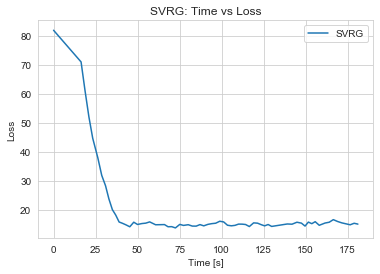

In [ ]:
plot('svrg', loss_svrg, time_svrg)

In [ ]:
#does the minimum point respect the bound on the domain? 
#np.linalg.norm(W_svrg, ord='nuc')

## Recap

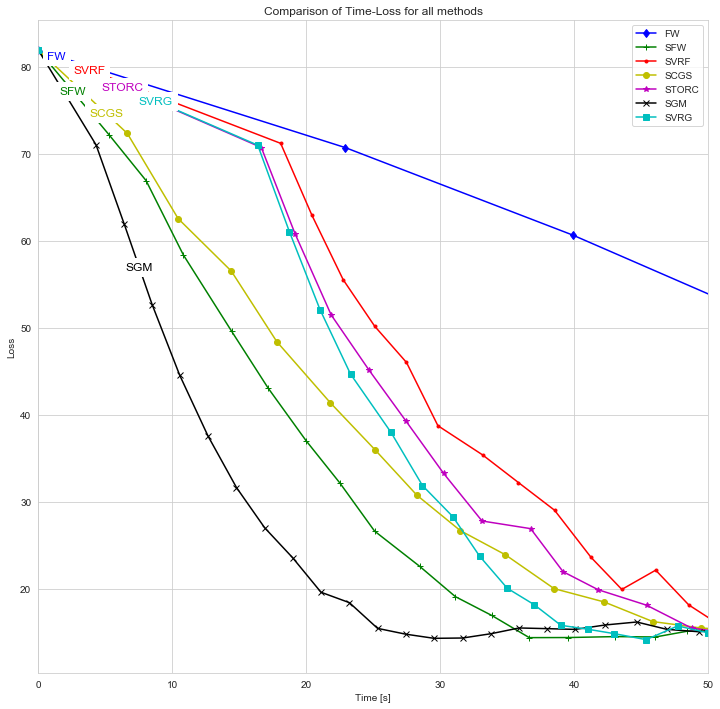

In [ ]:
plot_all(['FW', 'SFW','SVRF','SCGS','STORC','SGM','SVRG'], [loss_fw, loss_sfw,loss_svrf,loss_scgs,loss_storc,loss_sgm,loss_svrg], [time_fw, time_sfw,time_svrf,time_scgs,time_storc,time_sgm,time_svrg], xlimit=(0,50))

# small NORB

Source https://cs.nyu.edu/~ylclab/data/norb-v1.0-small/

(we used the downsampled version)

In [ ]:
features, classes = get_data("smallNORB-32x32.bz2")

# don't need sparse format
features = features.A

In [ ]:
# as usual we need the transpose of the data
features = features.T
features.shape

(2048, 24300)

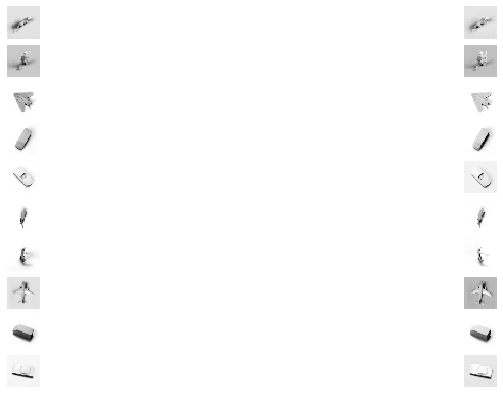

In [ ]:
# visualization of the two different channels related to each sample
k=10

fig, axes = plt.subplots(k,2, figsize=(15,7))

for i in range(k):
    im = np.reshape(features[:1024, i], (32,32))
    _ = axes[i,0].imshow(im, cmap="gray")
    im = np.reshape(features[1024:2048, i], (32,32))
    _ = axes[i,1].imshow(im, cmap="gray")
    axes[i,0].axis('off')
    axes[i,0].grid(b=None)
    axes[i,1].axis('off')
    axes[i,1].grid(b=None)

In [ ]:
classes = classes.astype(int)

# modify the global variables N, M, H inside the imported module
set_global_dimentions(N_new = features.shape[1],M_new = features.shape[0], H_new = len(np.unique(classes)))
from all_functions import N, M, H

print("M (n. of features): {}, N (n. of samples): {}, H (n. of classes): {}".format(M, N, H))

M (n. of features): 2048, N (n. of samples): 24300, H (n. of classes): 5


In [ ]:
#initialize initial weights as a sparse matrix. 
# remember: in the case of MNIST dataset the shape was 11x784
# now the shape is 1000 x sample_size --> much biggher --> much lower density to obtain nuclear norm <= 50

np.random.seed(2)
weights_initial = scipy.sparse.random(H, M, density=0.0006).A
#weights_initial = np.zeros((H,M))
print("Nuclear norm of initial weights: {}\n".format(np.linalg.norm(weights_initial, ord='nuc')))
print("Shape of initial weights: {} \n".format(weights_initial.shape))
print("Initial Loss: {}".format(loss_function(weights_initial, features, classes)))

Nuclear norm of initial weights: 2.458090895280839

Shape of initial weights: (5, 2048) 

Initial Loss: 158.69308770637105


## FW

In [ ]:
loss_fw, time_fw, weights_fw = fw(W = weights_initial, X = features, y = classes, 
                                  lr = 0.00002, maxit = 1000, step_width=sw, time_to_run=t)

Iteration: 1;  Time Elapsed: 0;  Loss: 158.69308770637105
Iteration: 1;  Time Elapsed: 2.5635440349578857;  Loss: 151.5527575606219
Iteration: 2;  Time Elapsed: 5.663998365402222;  Loss: 144.41257022147562
Iteration: 3;  Time Elapsed: 8.163334131240845;  Loss: 137.27252568607616
Iteration: 4;  Time Elapsed: 10.77326226234436;  Loss: 130.13262395156758
Iteration: 5;  Time Elapsed: 14.168812036514282;  Loss: 122.9928650151256
Iteration: 6;  Time Elapsed: 16.431220293045044;  Loss: 115.85324888157292
Iteration: 7;  Time Elapsed: 19.054900407791138;  Loss: 108.71377750905131
Iteration: 8;  Time Elapsed: 21.17648935317993;  Loss: 101.57470600005941
Iteration: 9;  Time Elapsed: 23.651031017303467;  Loss: 94.44034374809536
Iteration: 10;  Time Elapsed: 25.991491079330444;  Loss: 87.32105016898191
Iteration: 11;  Time Elapsed: 28.431370973587036;  Loss: 80.22631170871125
Iteration: 12;  Time Elapsed: 30.773096323013306;  Loss: 73.17186619243252
Iteration: 13;  Time Elapsed: 33.01018714904785; 

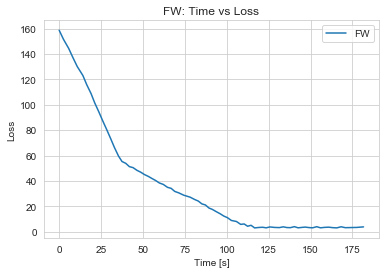

In [ ]:
plot('fw', loss_fw, time_fw)

In [ ]:
#does the minimum point respect the bound on the domain?
#np.linalg.norm(weights_fw, ord='nuc')

## SFW

In [ ]:
loss_sfw, time_sfw, weigths_sfw = sfw(W=weights_initial.copy(), X=features, y=classes, 
                                      lr=0.00001, maxit=1000, step_width=sw, time_to_run=t)

Iteration: 1;  Time Elapsed: 0;  Loss: 158.69308770637105
Iteration: 1;  Time Elapsed: 0.32981014251708984;  Loss: 155.14013291966955
Iteration: 2;  Time Elapsed: 0.5184760093688965;  Loss: 151.5971112368334
Iteration: 3;  Time Elapsed: 0.661776065826416;  Loss: 148.03104208777143
Iteration: 4;  Time Elapsed: 0.8103740215301514;  Loss: 144.46537348573486
Iteration: 5;  Time Elapsed: 0.9756181240081787;  Loss: 140.8963900201558
Iteration: 6;  Time Elapsed: 1.1405930519104004;  Loss: 137.3266231044906
Iteration: 7;  Time Elapsed: 1.2848591804504395;  Loss: 133.75737308309036
Iteration: 8;  Time Elapsed: 1.495116949081421;  Loss: 130.1878043936182
Iteration: 9;  Time Elapsed: 1.6494641304016113;  Loss: 126.61806872677843
Iteration: 10;  Time Elapsed: 1.8213920593261719;  Loss: 123.04843882383364
Iteration: 11;  Time Elapsed: 1.9871349334716797;  Loss: 119.47939473129341
Iteration: 12;  Time Elapsed: 2.228248119354248;  Loss: 115.90963495739493
Iteration: 13;  Time Elapsed: 2.4389801025390

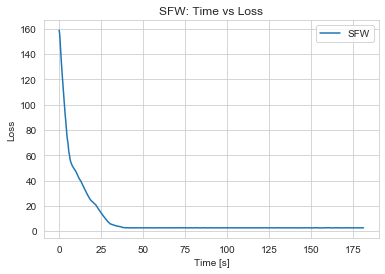

In [ ]:
plot('sfw', loss_sfw, time_sfw)

In [ ]:
#does the minimum point respect the bound on the domain?
print(np.linalg.norm(weigths_sfw, ord = 'nuc'))

2.472809510023393


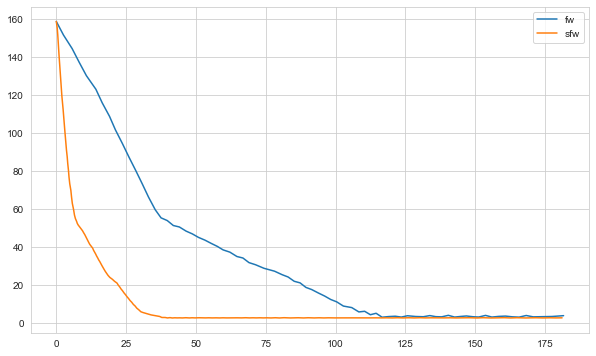

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(time_fw, loss_fw, label='fw')
plt.plot(time_sfw, loss_sfw, label='sfw')
plt.legend()
plt.show()

## SVRF

In [ ]:
loss_svrf, time_svrf, weights_svrf = svrf(W = weights_initial.copy(), X= features, y=  classes, epochs=50, 
                                          time_to_run=t, step_width = sw, lr=0.00001)

Iteration: 1;  Time Elapsed: 0;  Loss: 158.69308770637105
Iteration: 1;  Time Elapsed: 2.894608974456787;  Loss: 155.20752627821204
Iteration: 2;  Time Elapsed: 3.0208301544189453;  Loss: 151.6421975578485
Iteration: 3;  Time Elapsed: 3.1541330814361572;  Loss: 148.08408564321925
Iteration: 4;  Time Elapsed: 3.298469066619873;  Loss: 144.7525092497777
Iteration: 5;  Time Elapsed: 3.436145067214966;  Loss: 141.18702697863134
Iteration: 6;  Time Elapsed: 3.5823090076446533;  Loss: 137.62305376003422
Iteration: 7;  Time Elapsed: 3.7120041847229004;  Loss: 134.5811587147328
Iteration: 8;  Time Elapsed: 3.856842041015625;  Loss: 131.02742245197265
Iteration: 9;  Time Elapsed: 3.9869589805603027;  Loss: 127.46825500404067
Iteration: 10;  Time Elapsed: 4.132558107376099;  Loss: 123.90055335891941
Iteration: 11;  Time Elapsed: 4.279681205749512;  Loss: 120.34384021410588
Iteration: 12;  Time Elapsed: 4.415539979934692;  Loss: 116.77556248025202
Iteration: 13;  Time Elapsed: 4.540549039840698; 

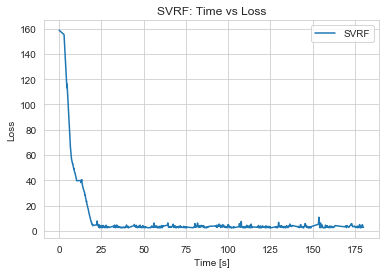

In [ ]:
plot('svrf', loss_svrf, time_svrf)

In [ ]:
#does the minimum point respect the bound on the domain?
print(np.linalg.norm(weights_svrf, ord = 'nuc'))

2.532655473941511


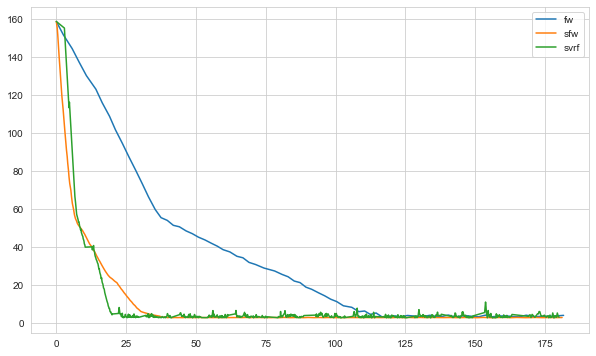

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(time_fw, loss_fw, label='fw')
plt.plot(time_sfw, loss_sfw, label='sfw')
plt.plot(time_svrf, loss_svrf, label='svrf')
plt.legend()
plt.show()

## SCGS

In [ ]:
info_fwg, loss_scgs, time_scgs, weights_scgs = scgs(W = weights_initial.copy(), X= features, y = classes, maxit = 1000, 
                                                    step_width=sw, time_to_run=t, lr=0.000015, lr_fwg = 0.3)

Iteration: 1;  Time Elapsed: 0;  Loss: 158.69308770637105
Iteration: 1;  Time Elapsed: 0.8542919158935547;  Loss: 153.3622067840788
Iteration: 2;  Time Elapsed: 1.3587520122528076;  Loss: 148.01456518330667
Iteration: 3;  Time Elapsed: 1.918231725692749;  Loss: 142.66316949284803
Iteration: 4;  Time Elapsed: 2.4395289421081543;  Loss: 137.31004555982534
Iteration: 5;  Time Elapsed: 3.16051983833313;  Loss: 131.95523653879212
Iteration: 6;  Time Elapsed: 3.7512640953063965;  Loss: 126.60063032849037
Iteration: 7;  Time Elapsed: 4.881078004837036;  Loss: 121.24571169529773
Iteration: 8;  Time Elapsed: 5.305530786514282;  Loss: 115.89112100760481
Iteration: 9;  Time Elapsed: 5.754178762435913;  Loss: 110.53656206754044
Iteration: 10;  Time Elapsed: 6.240681886672974;  Loss: 105.18216615078063
Iteration: 11;  Time Elapsed: 6.739340782165527;  Loss: 99.8282934805484
Iteration: 12;  Time Elapsed: 7.307041883468628;  Loss: 94.48048458561729
Iteration: 13;  Time Elapsed: 7.8727030754089355;  L

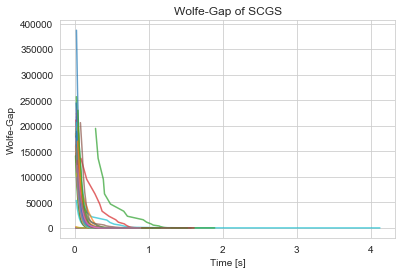

In [ ]:
plot_wg("SCGS",info_fwg,1)

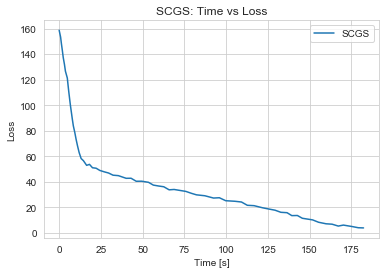

In [ ]:
plot('scgs', loss_scgs, time_scgs)

In [ ]:
#does the minimum point respect the bound on the domain?
np.linalg.norm(weights_scgs, ord='nuc')

2.454767385026797

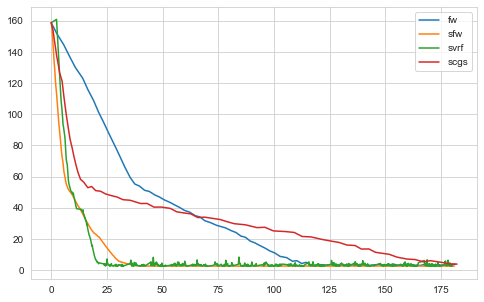

In [ ]:
plt.figure(figsize=(8,5))
plt.plot(time_fw, loss_fw, label='fw')
plt.plot(time_sfw, loss_sfw, label='sfw')
plt.plot(time_svrf, loss_svrf, label='svrf')
plt.plot(time_scgs, loss_scgs, label='scgs')
plt.legend()
plt.show()

## STORC

In [ ]:
info_fwg, loss_storc, time_storc, weights_storc = storc(W = weights_initial.copy(), X= features, y=classes, epochs=10,  
                                         step_width=sw, time_to_run=t, lr=0.00002, lr_fwg=0.3)

Iteration: 1;  Time Elapsed: 0;  Loss: 158.69308770637105
Iteration: 1;  Time Elapsed: 3.236830234527588;  Loss: 151.5539369389138
Iteration: 2;  Time Elapsed: 3.580566883087158;  Loss: 144.41428725840103
Iteration: 3;  Time Elapsed: 4.059653997421265;  Loss: 137.27475856401614
Iteration: 4;  Time Elapsed: 4.534368991851807;  Loss: 130.13645945395297
Iteration: 5;  Time Elapsed: 4.928910970687866;  Loss: 122.99887902491925
Iteration: 6;  Time Elapsed: 5.475475072860718;  Loss: 115.85932231011617
Iteration: 7;  Time Elapsed: 5.913069009780884;  Loss: 108.72288175998509
Iteration: 8;  Time Elapsed: 6.290998935699463;  Loss: 101.58499418135384
Iteration: 9;  Time Elapsed: 6.738588094711304;  Loss: 94.45066522449972
Iteration: 10;  Time Elapsed: 7.2406392097473145;  Loss: 87.3413576088848
Iteration: 11;  Time Elapsed: 7.826171159744263;  Loss: 80.24276444619652
Iteration: 12;  Time Elapsed: 8.294113874435425;  Loss: 73.254903673151
Iteration: 13;  Time Elapsed: 8.865539073944092;  Loss: 66

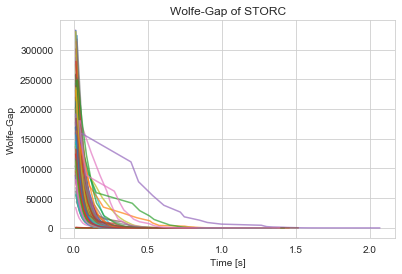

In [ ]:
plot_wg("STORC",info_fwg,1)

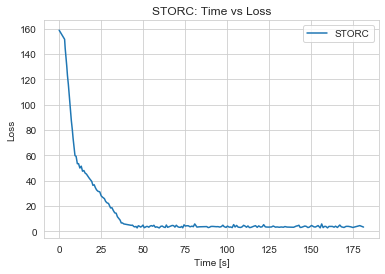

In [ ]:
plot('storc', loss_storc, time_storc)

In [ ]:
#does the minimum point respect the bound on the domain?
#np.linalg.norm(weights_storc, ord='nuc')

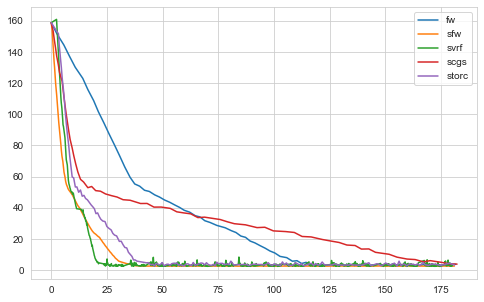

In [ ]:
plt.figure(figsize=(8,5))
plt.plot(time_fw, loss_fw, label='fw')
plt.plot(time_sfw, loss_sfw, label='sfw')
plt.plot(time_svrf, loss_svrf, label='svrf')
plt.plot(time_scgs, loss_scgs, label='scgs')
plt.plot(time_storc, loss_storc, label='storc')
plt.legend()
plt.show()

## SGM

In [ ]:
loss_sgm, time_sgm, W_sgm = sgm(W = weights_initial.copy(), X = features, y = classes, lr=0.00001
                                    , step_width=sw, maxit = 1000, time_to_run=t, batch_size=100, s=0.5)

Iteration: 1;  Time Elapsed: 0;  Loss: 158.69308770637105
Iteration: 1;  Time Elapsed: 0.33240509033203125;  Loss: 155.1233182738862
Iteration: 2;  Time Elapsed: 0.4940481185913086;  Loss: 151.55314957129866
Iteration: 3;  Time Elapsed: 0.6501388549804688;  Loss: 147.9834525396035
Iteration: 4;  Time Elapsed: 0.8045530319213867;  Loss: 144.41346799650682
Iteration: 5;  Time Elapsed: 0.9494030475616455;  Loss: 140.8436043943246
Iteration: 6;  Time Elapsed: 1.1148102283477783;  Loss: 137.27363909613123
Iteration: 7;  Time Elapsed: 1.2810821533203125;  Loss: 133.70406059983787
Iteration: 8;  Time Elapsed: 1.4402761459350586;  Loss: 130.13419778375783
Iteration: 9;  Time Elapsed: 1.6000070571899414;  Loss: 126.56450486723165
Iteration: 10;  Time Elapsed: 1.759993076324463;  Loss: 122.9956577607898
Iteration: 11;  Time Elapsed: 1.9032800197601318;  Loss: 119.42663305870937
Iteration: 12;  Time Elapsed: 2.146712064743042;  Loss: 115.85757599041655
Iteration: 13;  Time Elapsed: 2.330420970916

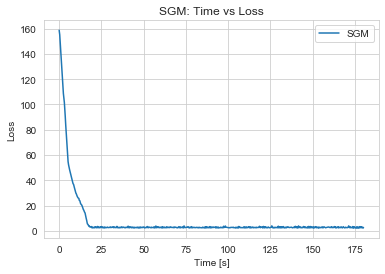

In [ ]:
plot('sgm', loss_sgm, time_sgm)

In [ ]:
#does the minimum point respect the bound on the domain?
#np.linalg.norm(weights_sgm, ord='nuc')

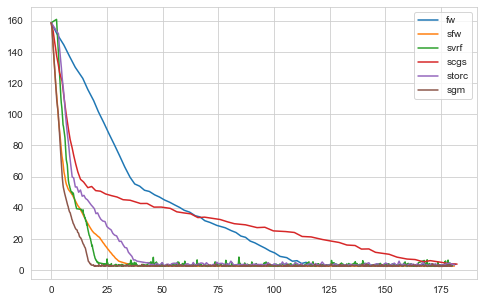

In [ ]:
plt.figure(figsize=(8,5))
plt.plot(time_fw, loss_fw, label='fw')
plt.plot(time_sfw, loss_sfw, label='sfw')
plt.plot(time_svrf, loss_svrf, label='svrf')
plt.plot(time_scgs, loss_scgs, label='scgs')
plt.plot(time_storc, loss_storc, label='storc')
plt.plot(time_sgm, loss_sgm, label='sgm')
plt.legend()
plt.show()

## SVRG

In [ ]:
loss_svrg, time_svrg, W_svrg = svrg(W = weights_initial.copy(), X = features, y = classes, lr=0.00001
                                    , step_width=sw, maxit = 1000, time_to_run=t, batch_size=100, s=0.5, epochs=50)

Iteration: 1;  Time Elapsed: 0;  Loss: 158.69308770637105
Iteration: 1;  Time Elapsed: 2.719963788986206;  Loss: 155.12444163820743
Iteration: 2;  Time Elapsed: 2.877100706100464;  Loss: 151.5549647083267
Iteration: 3;  Time Elapsed: 3.094169855117798;  Loss: 147.98560600113805
Iteration: 4;  Time Elapsed: 3.2519469261169434;  Loss: 144.41799973508085
Iteration: 5;  Time Elapsed: 3.449450969696045;  Loss: 140.84812371861034
Iteration: 6;  Time Elapsed: 3.5901880264282227;  Loss: 137.2782160401814
Iteration: 7;  Time Elapsed: 3.786080837249756;  Loss: 133.70932343133228
Iteration: 8;  Time Elapsed: 3.949784755706787;  Loss: 130.14184430400144
Iteration: 9;  Time Elapsed: 4.122782945632935;  Loss: 126.57246287371302
Iteration: 10;  Time Elapsed: 4.2622599601745605;  Loss: 123.00316977881577
Iteration: 11;  Time Elapsed: 4.4814839363098145;  Loss: 119.43366191265143
Iteration: 12;  Time Elapsed: 4.628533840179443;  Loss: 115.86445262634454
Iteration: 13;  Time Elapsed: 4.789634704589844; 

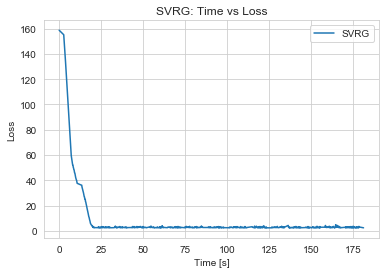

In [ ]:
plot('svrg', loss_svrg, time_svrg)

In [ ]:
#does the minimum point respect the bound on the domain?
#np.linalg.norm(weights_svrg, ord='nuc')

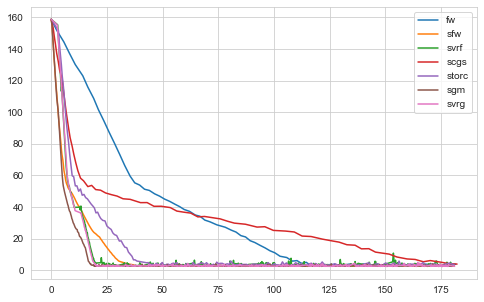

In [ ]:
plt.figure(figsize=(8,5))
plt.plot(time_fw, loss_fw, label='fw')
plt.plot(time_sfw, loss_sfw, label='sfw')
plt.plot(time_svrf, loss_svrf, label='svrf')
plt.plot(time_scgs, loss_scgs, label='scgs')
plt.plot(time_storc, loss_storc, label='storc')
plt.plot(time_sgm, loss_sgm, label='sgm')
plt.plot(time_svrg, loss_svrg, label='svrg')
plt.legend()
plt.show()

## Recap

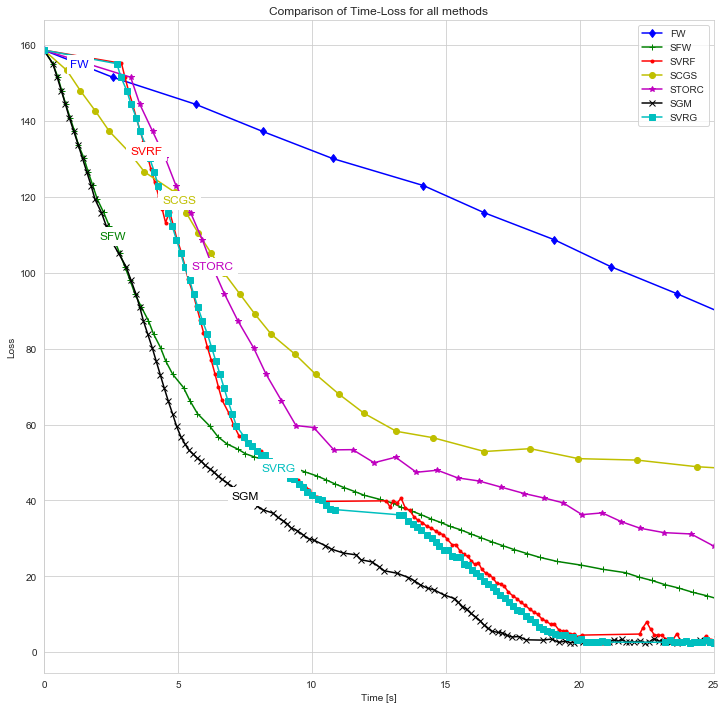

In [ ]:
plot_all(['FW', 'SFW','SVRF','SCGS','STORC','SGM','SVRG'], [loss_fw, loss_sfw, loss_svrf, loss_scgs, loss_storc, loss_sgm, loss_svrg], [time_fw, time_sfw, time_svrf, time_scgs, time_storc, time_sgm, time_svrg],xlimit=(0,25))